# Lab 1: Text Corpora and Language Modelling

Welcome to the first lab assignment of INFOMNLP 2023. 

This lab is meant to help you get familiar with some language data, and use this data to estimate simple models called N-gram language models.

First, you will use the **Penn Treebank**, which is a collection of newspaper articles from the newspaper 
The Wall Street Journal. The idea is to examine the data and notice interesting properties. This will not take more than a few lines of code. The Penn Treebank may be the most widely used corpus in NLP.

Then you will use a corpus consisting of **TedX** talks. This you will use to estimate an **N-gram language model** for different orders of N, and use this for some tasks.

The dataset URLs are in the notebook and certain cells are responsible to download them.

# Rules
* The assignment should submitted to **Blackboard** as `.ipynb`. Only **one submission per group**.

* The **filename** should be the group number, e.g., `01.ipynb` or `31.ipynb`.
 
* The questions marked **Extra** or **Optional** are an additional challenge for those interested in going the extra mile. There are no points for them.

**Rules for implementation**

* You should **write your code and answers in this iPython Notebook**. (See http://ipython.org/notebook.html for reference material.) If you have problems, please contact your teaching assistant.

* Use only **one cell for code** and **one cell for markdown** answers!    

    * Put all code in the cell with the `## YOUR CODE HERE ##` comment.
    * Provide brief comments on what the code does at crucial points.
    * For theoretical questions, put your solution in the `█████ YOUR ANSWER HERE █████` cell and keep the header.

* Don't change or delete any initially provided cells, either text or code, unless explicitly instructed to do so.
* Don't delete the comment lines `#TEST...` or edit their code cells. 
* Don't change the names of provided functions and variables or arguments of the functions. 
* Leave the output of your code in the output cells.
* Don't output unnecessary info (e.g., printing variables for debugging purposes). This clutters the notebook and slows down the grading.
* Test your code and **make sure we can run your notebook** in the colab environment.

<font color="red">You following these rules helps us to grade the submissions relatively efficiently. If these rules are violated, a submission will be subject to penalty points.</font>  

# <font color="red">Contributions</font>
The initial layout of the project was:
* Jose Luis Cano-Manuel Claver: 2.1 & 2.2
* Ruben Kole: 1.1 - extra
* Raquel González López: 1.2 & 2.3-2.6

but everyone assisted on each other's sections. 

# Set up

In [ ]:
%matplotlib inline
import matplotlib
import numpy as np
import random
import pandas as pd
import seaborn as sns  
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

In [ ]:
! rm -rf data # remove if it was downloaded
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged # download the file
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt
! wget -nv -P data https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt

2023-05-16 20:21:18 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec02-21.gold.tagged [8158400/8158400] -> "data/sec02-21.gold.tagged" [1]
2023-05-16 20:21:18 URL:https://naturallogic.pro/_files_/download/mNLP/PTB/sec00.gold.tagged [399917/399917] -> "data/sec00.gold.tagged" [1]
2023-05-16 20:21:20 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-train.txt [24743290/24743290] -> "data/ted-train.txt" [1]
2023-05-16 20:21:21 URL:https://naturallogic.pro/_files_/download/mNLP/TED/ted-test.txt [25383/25383] -> "data/ted-test.txt" [1]


# Golab variables

In [ ]:
PTB_FILES = {'train': 'data/sec02-21.gold.tagged', 'dev': 'data/sec00.gold.tagged'}
TED_FILES = {'train': 'data/ted-train.txt', 'test': 'data/ted-test.txt'}

# 1. Penn treebank

## Ex 1.1 [30pt]

You are provided with a corpus containing tokens with their Part-of-Speech tags (POS-tags for short). The format is
**token|POS** (one sentence per line) and the file name is **sec02-21.gold.tagged**. This data is extracted from Sections 02-21 from the Penn Treebank: these sections are most commonly used for training statistical models like POS taggers and parsers.

Note the **distinction between token & word**. "Token" is a technical term and represents an occurrence of a word. Here, "word" covers both lexical words and other symbols (e.g., punctuations or numbers). Often "word" is called "token type". So, one can say that a token type can have different occurrences and each occurrence is a token.

**[Hint]** **Figure 8.2** in chapter 8 of Jurafsky and Martin (see [here](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4)) holds a summary of POS-tags used in the Penn Treebank tagset together with their meaning and some examples.

**[Hint]** The Python library [collections](https://docs.python.org/3.7/library/collections.html) has an object called `Counter` which will come in handy for this exercise.

### (a) Corpus & vocab [5pt]

**Print** the corpus size (i.e. the number of **tokens**).  
**Print** the size of the **vocabulary** of the corpus. Estimate the vocabulary size both by **lowercasing** all the tokens as well as by leaving the tokens in their **original orthography**.  

What is the **advantage** of lowercasing all the tokens in your corpus?  
What is a notable **downside**?  
**Give examples** of the advantage and the downside.

In [ ]:
## YOUR CODE HERE ##
# Use PTB_FILES golab var

f = open(PTB_FILES["train"],"r")
lines = f.readlines()

N_tokens = 0
all_tokens, all_lowercase_tokens = [], []
all_pairs = []  # Use for later excercises
token_counter = Counter()

for sentence in lines:  # For each sentence, split the words and count these since they are tokens
  sentence = sentence.split()
  N_tokens += len(sentence)

  for pair in sentence: # For each token|pos pair, select the token and add it to the relevant list
    pair = pair.split("|")
    all_pairs.append(pair)
    all_tokens.append(pair[0])
    all_lowercase_tokens.append(pair[0].lower())
    token_counter[pair[0]] += 1


# Change the list into a set to remove duplicates and count unique values. 
unique_tokens_set = set(all_tokens)
unique_lowercase_tokens_set = set(all_lowercase_tokens)


print("The total corpus size is {}".format(N_tokens))
print("The size of the vocabulary is between {} when lowercasing words and {} when using the original orthography.".format(len(unique_lowercase_tokens_set), len(unique_tokens_set)))


# TEST: original orthography vocab size = ...10

The total corpus size is 929552
The size of the vocabulary is between 39384 when lowercasing words and 44210 when using the original orthography.


█████ YOUR ANSWER HERE █████

* What is the advantage of lowercasing all the tokens in your corpus?
* What is a notable downside?
* Give examples of the advantage and the downside.

------
**For the rest of this exercise <font color="red">you should use the original orthography</font> of the data when answering the questions.**

------

### [Extra] 

Plot a graph of word frequency versus rank of a word, in this corpus. Does this corpus obey **Zipf’s law**? For a better picture you might need to make the plot horizontally wide or consider an initial cutoff of ranked words. 

<Figure size 640x480 with 0 Axes>

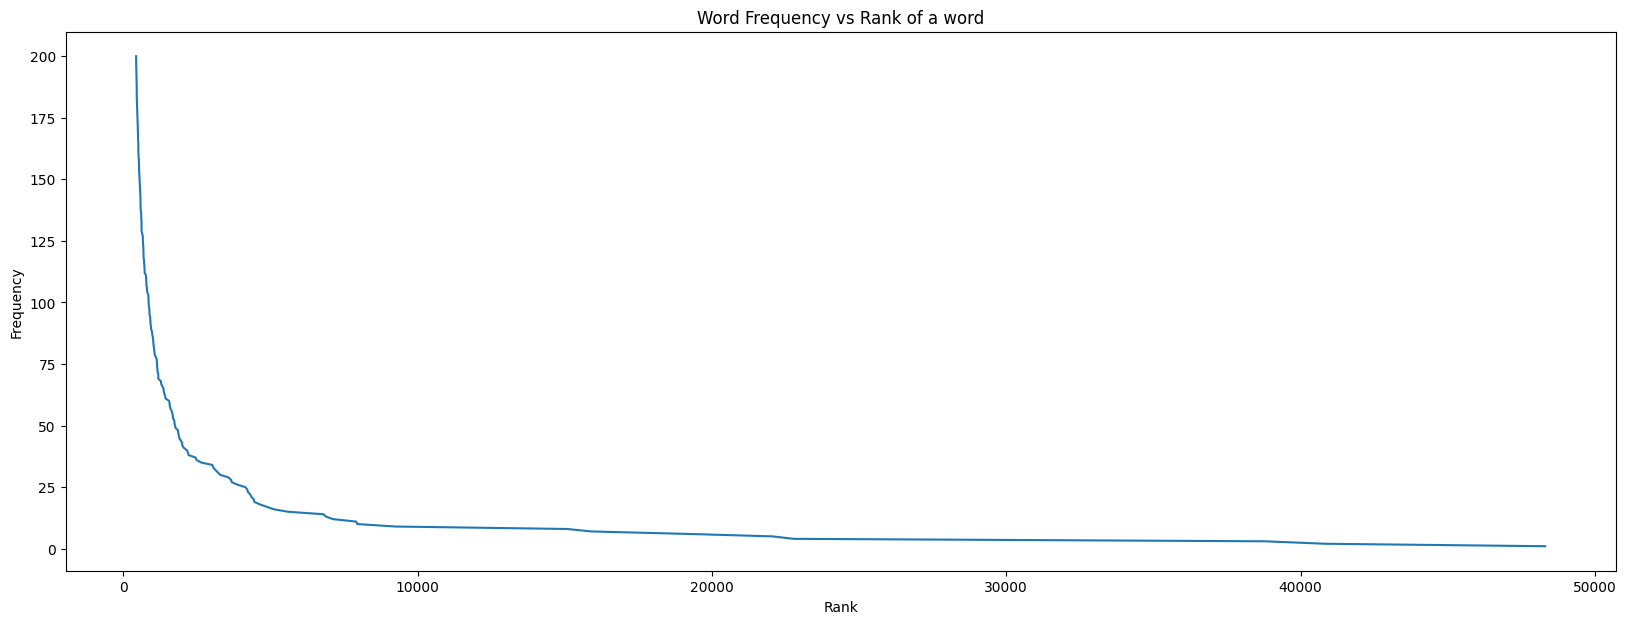

In [ ]:
## YOUR CODE HERE ##

sorted_tokens = sorted(token_counter.items(), key=lambda x: x[1], reverse = True)[0:200]

word_frequency = [count for token, count in sorted_tokens]
rank = list(range(1, len(word_frequency)+1))

# Plot the graph
fig = plt.figure()

plt.figure(figsize=(20,7))
plt.plot(word_frequency,rank)
plt.xlabel("Rank")
plt.ylabel("Frequency")
plt.title("Word Frequency vs Rank of a word")
plt.show()

█████ YOUR ANSWER HERE █████

A cut-off was made after 200 appearances. The graph indicates that the dataset adheres to Zipf's law since the shape indicates a logarithmic trend. This suggests that the the most frequent word appears twice as often as the second most frequent word. 

### (b) Tags & tokens [5pt]

**Print** a list of the **10 most commonly occurring POS tags** in the data. For each of these POS tags, additionally **print** the **3 most common token types** (i.e., words) that belong to that tag. Print raw counts for each printed tag and token type.

In [ ]:
## YOUR CODE HERE ##
# Use the following printing format and test your numbers for the DT pos tag:
# DT (82147):	the(40831); a(19151); The(6753)

pos_tags = []
for _, pair in all_pairs:
    pos_tags.append(pair)

top_ten = Counter(pos_tags).most_common(10)

for pos_tag in top_ten: # pos_tag is [pos-tag, N]
  pos_tags_list = []
  for pair in all_pairs:
    if pos_tag[0] == pair[1]:
      pos_tags_list.append(pair[0])
  top_three = Counter(pos_tags_list).most_common(3)
  print("{} ({}): {}({}); {}({}); {}({})".format(pos_tag[0], pos_tag[1],
                                               top_three[0][0],top_three[0][1],
                                               top_three[1][0],top_three[1][1],
                                               top_three[2][0],top_three[2][1]))

NN (132134): %(4866); company(2457); year(2220)
IN (99413): of(22778); in(14852); for(7907)
NNP (90711): Mr.(4147); U.S.(1577); Corp.(1186)
DT (82147): the(40831); a(19151); The(6753)
JJ (59643): new(1396); other(1298); last(990)
NNS (59332): years(1164); shares(1128); sales(939)
, (48314): ,(48310); an(1); 2(1)
. (39252): .(38798); ?(392); !(62)
CD (36148): million(4355); billion(1780); one(1203)
RB (30232): n't(3211); also(1420); not(1287)


### (c) Ambiguity [10pt]

A single token type (i.e. word) may occur with several POS tags. For example, *record* can be both a **noun** *(buy a record)* or a **verb** *(record a lecture)*. This makes POS tags extremely useful for **disambiguation**.

**Print** the percentage(!) of the **ambiguous** words in the vocabulary(!) (i.e. token types that have more than one POS tag?).  

Ambiguous words do not account for a great percentage of the vocabulary. Yet they are among the most commonly occurring words in the English language.  
**Print** the percentage of the dataset that is ambiguous (i.e., counting tokens of ambiguous token types/words wrt data size).  
(Don't round percentages when printing)

**Print** the **10 most frequently shared POS tag pairs** (i.e. POS tag pairs that share most words).  
**Print** the **4 most ambiguous** words (i.e. based on the number of POS tags it can get)

In [ ]:
## YOUR CODE HERE ##
# TEST: There are 1060 tokens whose tokens get both ('VBD', 'VBN') tags
# TEST: in other tokens, a set of tokens with VBD and a set of tokens with VBN share 1060 elements 

# print in the following way:
# Print ambiguous tokens and tag pairs as, where tags are ordered alphabetically:
# Top 10 confused tag pairs:
#	('VBD', 'VBN') share 1060 tokens 
#   ...
# Top 4 ambiguous tokens:
# 	token: [POS_1, ..., POS_n]
#   ...

from operator import itemgetter
import itertools

sets = set(tuple(row) for row in all_pairs)  # remove duplicates from the all_pairs data
word_counts = {}
for word, _ in sets:  # For all words, check their occurences
    if word not in word_counts:
        word_counts[word] = 1  # If the word is not present, add it
    else:
        word_counts[word] += 1  # If it is present, add 1 to the counter

double_count = sum(count > 1 for count in word_counts.values())  # Count multiple occuring tokens.
percentage_double_count = (double_count / len(unique_tokens_set)) * 100  # Calculate percentage
print("Using the original orthography, the percentage of the vocabulary that has multiple POS tags is {}%".format(percentage_double_count))


ambi_tokens_set = set(word for word, count in word_counts.items() if count > 1) # Create a set of all tokens with >1 pos_tag
ambi_counter = sum(1 for token, _ in all_pairs if token in ambi_tokens_set)  # Count the total amount of appearences these tokens have
print("The percentage of the dataset that is ambiguous is {}% \n".format((ambi_counter / N_tokens)*100))


token_dict = defaultdict(list)
for token, tag in sets:
    token_dict[token].append(tag)

# Make a list containing all multiple pos_tags
new_list = [token_dict[token] for token in ambi_tokens_set if token in token_dict]

# Create a dict containing all possible combinations of pos's 
all_pos_tags = set()
for _, pos_tag in sets:
  all_pos_tags.add(pos_tag)

pairs = list(itertools.combinations(all_pos_tags, 2))
pairs = {pair: 0 for pair in pairs}

for tag1, tag2 in pairs:
  for pos_tags in new_list:
    if tag1 in pos_tags and tag2 in pos_tags:
      pairs[tag1, tag2] += 1
top_ten = sorted(pairs.items(), key=itemgetter(1), reverse=True)[0:10]

for pos_tags, N in top_ten:
  print("{} share {} tokens".format(sorted(pos_tags), N))


print(" \n Top 4 ambiguous tokens:")
ambi_tokens = sorted(word_counts.items(), key=itemgetter(1), reverse=True)
top_four = ambi_tokens[0:4]  # Gives the 4 most ambiguous tokens
for ambi_token, _ in top_four:  # For every top_four ambiguous token seek the pos_tags
  pos_tags = set()
  for token, pos_tag in sets:
    if ambi_token == token:
      pos_tags.add(pos_tag)
  print(ambi_token, sorted(pos_tags))

Using the original orthography, the percentage of the vocabulary that has multiple POS tags is 13.469803211942999%
The percentage of the dataset that is ambiguous is 55.079005800643756% 

['VBD', 'VBN'] share 1060 tokens
['JJ', 'NN'] share 962 tokens
['NN', 'VB'] share 775 tokens
['VB', 'VBP'] share 752 tokens
['NN', 'NNP'] share 627 tokens
['JJ', 'VBN'] share 456 tokens
['NN', 'VBP'] share 403 tokens
['NN', 'VBG'] share 378 tokens
['NNS', 'VBZ'] share 364 tokens
['JJ', 'NNP'] share 297 tokens
 
 Top 4 ambiguous tokens:
open ['JJ', 'NN', 'RB', 'RP', 'VB', 'VBP', 'VBZ']
down ['IN', 'JJ', 'NN', 'RB', 'RBR', 'RP', 'VBP']
set ['JJ', 'NN', 'VB', 'VBD', 'VBN', 'VBP', 'VBZ']
many ['DT', 'JJ', 'NN', 'NP', 'PDT', 'RB', 'VB']


### (d) Explain [10pt]

**Take one** of the 4 most ambiguous tokens and for **each** of its possible POS tags **give** a sentence/phrase that shows the use of the token with its POS tag.  
For the other **three** tokens, **discuss one** POS tag that is most unlikely for the corresponding token.      
Consult [Figure 8.2](https://web.stanford.edu/~jurafsky/slp3/8.pdf#page=4) for the interpretation of the POS tags. If you would like a more detailed explanation of the POS tags, consult [this technical report](https://repository.upenn.edu/cgi/viewcontent.cgi?article=1246&context=cis_reports). Of course, you don't need to read it properly, just use it to search for certain POS tags in it.

█████ YOUR ANSWER HERE █████

Token: down
- 'JJ': The open can of tomatoes was used in the pasta. 
- 'NN': The sheep was lying there in the open. 
- 'RB': They were talking about their breakup openly.
- 'RP': Janr keeps the window open because it's hot inside.
- 'VB': Can you please open the window?
- 'VBP': We usually open the concert with "Hips don't lie".
- 'VBZ': The doorknob opens the door, it's easy.

"Many" is usually an adjective denoting more, most, a pronoun or a determiner. It inidcates a large quantity. Therefore, the use of it as a base verb is not common. 

In the case of "down", the RP (particle) tag is a type of grammatical word that typically does not have its own lexical meaning but rather works with other words to create various meanings. In English, particles are relatively uncommon and are typically used in specific constructions or phrasal verbs. Thus, down would likely be other type of words like noun or adjective. 

Similarly, regarding "set" particle might be the least common use of it, too. It does not modify the meaning of a verb in the same way that other particles do. "Set" is generally used as a transitive verb. However, there are a few rare instances where "set" can be used as a particle, such as in the phrasal verb "settle down".


## Ex 1.2 [10pt] 

You are also provided with another file called **sec00.gold.tagged**. 
Section 00 of the Penn Treebank is typically used as development data.

### (a) Unseen % [5pt]

**Print** the percentages of the **unseen development vocabulary** and **unseen development data** (i.e., token types and tokens that occur in the development data but not in the training data). Percentages should be calculated wrt the development vocabulary/data size and they shouldn't be rounded.

In [ ]:
## YOUR CODE HERE ##
# Use PTB_FILES global var
# TEST: Difference between the %age is in interval 11-14%

all_pairs_dev, all_tokens_dev = [], []  # Use for later excercises

with open(PTB_FILES['train']) as f_train:
    train = f_train.read().split()


for token_tag in dev:
  pair = token_tag.split("|")
  all_pairs_dev.append(pair)
  all_tokens_dev.append(pair[0])

# calculate data difference with respect to the total length of development data
data_diff = set(all_tokens_dev) - set(all_tokens)
percentage_unseen_data = len(data_diff) / len(all_tokens_dev) * 100

# calculate vocabulary difference with respect to the total length of development data
unique_tokens_train = set(all_tokens)
unique_tokens_dev = set(all_tokens_dev)
vocab_diff = unique_tokens_dev - unique_tokens_train
percentage_unseen_vocab = len(vocab_diff) / len(unique_tokens_dev) * 100

print("The percentage of the vocabulary that is unseen is {}% and the unseen development data is {}% of the data".format(percentage_unseen_vocab, percentage_unseen_data))

The percentage of the vocabulary that is unseen is 16.34932724041635% and the unseen development data is 2.835630311302893% of the data


### (b) Unseen tok tag [5pt]

**Print** the top **five** POS tags that the most **unseen tokens** belong to.

In [ ]:
## YOUR CODE HERE ##
# Print in the following format and test your number for NNS:
# 146	NNS

unseen_pos_counter = Counter()
# iterate over each token in data_diff
for token in data_diff:
  # iterate over all_pairs_dev
  for token_tag in all_pairs_dev:
    # check is token corresponds to the first element in pairs
    if token == token_tag[0]:
      # add the corresponding tag to the counter
      tag = token_tag[1]
      unseen_pos_counter[tag] += 1

# get the top 5 most common tags
top_five_tags = unseen_pos_counter.most_common(5)

print("Top five POS tags with the most unseen tokens:")
for pos, count in top_five_tags:
    print("{} {} ".format(count, pos))

Top five POS tags with the most unseen tokens:
815 NNP 
258 JJ 
210 NN 
146 NNS 
114 CD 


# 2. Language Models



The following questions presuppose J&M's [chapter 3 on n-gram language models](https://web.stanford.edu/~jurafsky/slp3/3.pdf).

Models that assign **probabilities** to **sequences of words** are called **language
models** or **LMs**. The simplest model that assigns probabilities to sentences and sequences of words is the **N-gram** model.

Recall that an *N*-gram language model uses **conditional probabilities** of the form
    
$$P(w_k \mid w_{k-N+1} \dots w_{k-1})$$

to **approximate** the full **joint probability**

$$P(w_1 \dots w_n)$$

of a sequence of words $w_1 \dots w_n$.

The easiest way of obtaining estimates for the probabilities $P(w_k \mid w_{k-N+1} \dots w_{k-1})$ is to use the **maximum likelihood estimate** or **MLE**, a widely used statistical estimation method ([read more](https://en.wikipedia.org/wiki/Maximum_likelihood_estimation)). You count and normalize:

$$P_{MLE}(w_k \mid w_{k-N+1} \dots w_{k-1}) = \frac{C(w_{k-N+1} \dots w_{k-1} w_k)}{C(w_{k-N+1} \dots w_{k-1})}.$$

## Ex 2.1 [25pt] 

In this exercise you will have to train $N$-gram language models with an optional smoothing.

#### Some help

The `collections` library has another useful data structure: the `defaultdict`. Some example uses (learn more [here](https://realpython.com/python-defaultdict/) if needed):

**[Datastructure hint]** If you store the smoothed language in a naive manner (that is, to store *all* the numbers separately) your datastructure will get huge! If $V$ is the vocabulary then the smoothed bigram model assigns probabilities to $|V|^2$ entries. If $|V|$ is around 80k, the naive way requires you to store more than 64 billion floats. Yet almost all of these are actually just $P(w_n|w_{n-1}) = \frac{k}{N + k|V|}$, with $k$ the value with which you smooth and $N=C(w_{n-1})$. Think about how you use this fact to make your model work in practice.

In [ ]:
from collections import defaultdict

d = defaultdict(float)
d["new key"]

0.0

Compare that to an ordinary dictionary:

In [ ]:
# d = dict()
# d["new key"]
# Throws an KeyError: 'new key'

Other datatypes as `default_factory`:

In [ ]:
d = defaultdict(int)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'int'>, {})
0
defaultdict(<class 'int'>, {'new key': 0})


In [ ]:
d = defaultdict(list)
print(d)
print(d["new key"])
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {'new key': []})


Note how the defaultdict is modified after getting a value of a non-existing key. If you want to avoid modifying the defaultdict when getting a value for a non-existing key, do the following:

In [ ]:
d = defaultdict(list)
print(d)
print(d.get("new key", d.default_factory()))
print(d)

defaultdict(<class 'list'>, {})
[]
defaultdict(<class 'list'>, {})


Converting an already existing `dict`:

In [ ]:
d1 = {k: "value" for k in range(1, 11)}
d = defaultdict(float, d1) # convert it to a defaultdict
print(d[5])
print(d[100])

value
0.0


This doesn't work:

In [ ]:
# d = defaultdict(10)
# Throws a TypeError: first argument must be callable or None

Use a `lambda` to make the number `10` `callable`":

In [ ]:
d = defaultdict(lambda: 10)
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x7f589f1a7880>, {})
10
defaultdict(<function <lambda> at 0x7f589f1a7880>, {'new key': 10})


In [ ]:
d = defaultdict(lambda: defaultdict(float))
print(d)
print(d["new key"])
print(d)

defaultdict(<function <lambda> at 0x7f589f1a64d0>, {})
defaultdict(<class 'float'>, {})
defaultdict(<function <lambda> at 0x7f589f1a64d0>, {'new key': defaultdict(<class 'float'>, {})})


Note that in some cases the behaviour of lambda functions might be counterintuitive. One of such cases is the closure: [link1](https://realpython.com/python-lambda/#closure), [link2](https://stackoverflow.com/questions/2295290/what-do-lambda-function-closures-capture).

In [ ]:
# making a shortcut for the read-only get for defaultdict that supports several keys
# i.e. defget(d, [k1, k2]) will return the value of d[k1][k2] without altering d 
def defget(d, keys):
    for k in keys:
        d = d.get(k, d.default_factory() if isinstance(d, defaultdict) else None) #PATCH
    return d

# testing if it works as intended
d = defaultdict(lambda: defaultdict(int))
d[1][1] = 2
d[2][1] = 3
print(d) 
print(defget(d, [1, 1]))
print(defget(d, [3]))
print(defget(d, [3, 1]))
print(d)

defaultdict(<function <lambda> at 0x7f58b1ae9bd0>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})
2
defaultdict(<class 'int'>, {})
0
defaultdict(<function <lambda> at 0x7f58b1ae9bd0>, {1: defaultdict(<class 'int'>, {1: 2}), 2: defaultdict(<class 'int'>, {1: 3})})


Clever use of a `defaultdict` can be the solution to the problem of data-storing in a smoothing $N$-gram pointed out above:
    
    d = bigram_frequencies[history] = {w1: 120, w2: 340, w3: 7 ...}
    N = sum(d.values())
    # d_normalized = .... # normalize d with smoothing applied to elements already in the dictionary  
    d_smoothed = defaultdict(lambda: k/(N + kV), d_normalized) # add smoothing to 'unseen' words

The following function is given to assist you with reading the data from the file in a convenient format. Understand how the function works and figure out how to use it for training n-grams.

In [ ]:
def read_data(fname, h=1, max_lines=np.inf): 
    """
    Reads in the data from a file and returns a vocabulary as a set
    and the sentence-padded data as a list of list. 
    
    :param fname: path to the file
    :param max_lines: the number of top lines to read (can be used for debugging)
    :param h: the length of n-gram history
    :returns: data as a list of lists and vocabulary as a set    
    """
    data = []
    start = h * ["<s>"]
    end = ["</s>"]
    vocab = set()
    
    with open(fname, "r") as F:
        for k, line in enumerate(F):
            # an optional cut-off to read a part of the data
            if k > max_lines:
                break
            words = line.strip().split()
            vocab.update(words)
            # padding the sentence             
            sent = start + words + end
            data.append(sent)

    return data, vocab

### train_ngram

[15pt] **Complete** the function `train_ngram` so that you can train a count-based $N$-gram language model on the data found in `data/ted-train.txt` and train this for $N=2,3,4$. 

[10pt] **Extend** the function `train_ngram` so that it accepts a parameter `k` for optional add-$k$ smoothing (upgrade the same function, don't define new). 

In [ ]:
from collections import defaultdict

def train_ngram(data, N, k):
    """
    Trains an n-gram language model with optional add-k smoothing
    and additionally returns the unigram model
    
    :param data: text-data as returned by the pre-defined function read_data
    :param N: (N>1) the order of the ngram e.g. N=2 gives a bigram
    :param k: optional add-k smoothing
    :returns: ngram and unigram
    """

    # Definitions 
    ngram = defaultdict(lambda: defaultdict(int))
    unigram = defaultdict(int)
    total_counts = defaultdict(int)

    # Loop over the sentences 
    for sent in data:
        sent_len = len(sent)

        # Loop over the words 
        for i, word in enumerate(sent):
            
            # BOS and EOS are not considered for the unigram. Not valuable information.  
            if word !='<s>' and word != '</s>':
                unigram[word] += 1 

            # Prevents the combination of history + word go outside the sentence
            if i >= sent_len - N + 1: 
              continue
            if word != '</s>': 
                history = ' '.join(sent[i:i+N-1])
                ngram[history][sent[i+N-1]] += 1
                total_counts[history] += 1

    # The number of different words in the data 
    vocab_size = len(unigram)

    # The function for lambda, since it depends on the independent frequency for each word.
    # Prevents lambda to be have the last value of the iteration. 
    def create_lambda(k, total_count, vocab_size):
        return lambda : k / (total_count + k * vocab_size)

    # Define the corresponding lambda for all the possible unseen histories/words
    for history in ngram:
        total_count = total_counts[history]
        for word in ngram[history]:
            ngram[history][word] = (ngram[history][word] + k) / (total_count + k*vocab_size)
        ngram[history] = defaultdict(create_lambda(k, total_count, vocab_size), ngram[history])

    # BOS and EOS are not considered for the unigram. Not valuable information.  
    total_count_unigram = sum(unigram[word] for word in unigram if word != '<s>' and word != '</s>')

    # Get the smoothed unigram
    smoothed_unigram = defaultdict(create_lambda(k, total_count_unigram , vocab_size ))
    for word in unigram:
          if word != '<s>' and word != '</s>':
              smoothed_unigram[word] = (unigram[word] + k) / (total_count_unigram + k*vocab_size)
          else:
              smoothed_unigram[word] = 0.0

    return ngram, smoothed_unigram

In [ ]:
# shouldn't take more than 2min
Data1, vocab = read_data('data/ted-train.txt')
# use the global variable for the file path

# non-smoothed bigram
Bigram, Unigram = train_ngram(Data1, N=2, k=0)
# smoothed bigram
Bigram_sm, Unigram_sm = train_ngram(Data1, N=2, k=1)

In [ ]:
# might take significant amount of memory
# shouldn't take more than 3min
Data2, vocab = read_data('data/ted-train.txt',h=2) # h = 2 is chosen so that it starts with two <s>

# non-smoothed trigram
Trigram, Unigram_ = train_ngram(Data2, N=3, k=0)
# smoothed trigram
Trigram_sm, Unigram_sm_ = train_ngram(Data2, N=3, k=1)

In [ ]:
#TEST 2.1 
#!!! be aware that when getting a value of a non-existing key from defaultdict with d[key] method, 
# the key gets inserted into the defaultdict. That's why tests use defget
assert defget(Bigram, ['all','people']) > 0
assert defget(Bigram, ['all','all']) == 0
assert defget(Bigram_sm, ['all','all']) == defget(Bigram_sm, ['all','asdasda'])
assert defget(Bigram_sm, ['all','asdasda']) > 0
assert defget(Trigram, ['<s> <s>','The']) > 0
assert defget(Trigram, ['<s> <s>','sun']) == 0
assert np.isclose(sum(Trigram['All the'].values()), 1) 
assert defget(Trigram_sm, ['<s> <s>','sun']) > 0
assert Unigram == Unigram_
assert Unigram_sm == Unigram_sm_

## Ex 2.2 [5pt]

You can use an *N*-gram language model to **generate text**. The higher the order *N* the better your model will be able to catch the long-range dependencies that occur in actual sentences and the better your chances are at generating sensible text. But beware: **sparsity** of language data will quickly cause your model to reproduce entire lines from your training data; in such cases, only one $w_k$ was observed for the histories $w_{k-N+1}\dots w_{k-1}$ in the entire training set.

### Some help

**[Hint]** You can use the method of [inverse transform sampling](https://en.wikipedia.org/wiki/Inverse_transform_sampling) to generate a sample from a **categorical distribution**, $p_1\dots p_k$ such that $p_i \geq 0$ and $\sum_{i=1}^k p_i = 1$, as follows:

In [ ]:
import random

P = [0.2, 0.5, 0.2, 0.1]

def sample(P):
    u = random.random() # random number between 0 and 1
    p = 0
    for i, p_i in enumerate(P):
        p += p_i
        if p > u: 
            return i # the first i s.t. p1 + ... + pi > u
        
print(sample(P))

2


Inverse transform sampling in the words of Jurafsky and Martin:

> Imagine all the words of the English language covering the probability space
between 0 and 1, each word covering an interval proportional to its frequency. We
choose a random value between 0 and 1 and print the word whose interval includes
this chosen value.

(J&M, [section 3.3](https://web.stanford.edu/~jurafsky/slp3/3.pdf#page=10))

### generate_sent

**Complete** the function `generate_sent`. It takes a language model `lm` and an order `N` and should generate a natural language string(!) (it might not be a grammatical sentence) by **sampling** from the language model.

In [ ]:
def generate_sent(lm, N):
    """
    Generates sentence from a language model based on N-grams
    :param lm: language model based on N-grams
    :param N: denoting N-gram parameter
    :returns: a string of natural language tokens where tokens are separated with a space
    """
    
    ## YOUR CODE HERE ##
    ## you can have auxiliary functions if needed, inside of outside this function's scope

    if N==2:  # for bigrams start with one EOS
      text = '<s>'
      new_word = '<s>'
      end = False

      while end == False:  # While EOS has not been reached
        word_values = []
        new_word_dist = defget(Bigram, [new_word])  # Find prob for next word

        for i in new_word_dist:
          word_values.extend([[i, new_word_dist[i]]])

        # Use the code from above
        u = random.random() # random number between 0 and 1
        p = 0
        for i , p_i in word_values:
          p += p_i
          if p > u: 
            new_word = i
            text = text + ' ' + new_word

            if new_word == "</s>":  # End loop
              end = True
            break

    if N==3:  # For trigrams
      text = '<s> <s>'
      new_word = '<s> <s>'
      end = False

      while end == False:  # When the end has not been reached yet.
        word_values = []

        if new_word != '<s> <s>':
          join_word = previous_word + ' ' + new_word
        else:
          join_word = '<s> <s>'
          i = '<s>'

        new_word_dist = defget(Trigram, [join_word])
        previous_word = i

        for i in new_word_dist:
          word_values.extend([[i, new_word_dist[i]]])

        # Code from above
        u = random.random() # random number between 0 and 1
        p = 0
        for i , p_i in word_values:
          p += p_i
          if p > u: 
            text = text + ' ' + i
            new_word = i
            if new_word == "</s>":  # End loop
              end = True
            break
            
    return text

In [ ]:
#TEST Ex2.2
random.seed(42) #uncommnet if you want to make the output non-deterministic

print("Bigrams:\n")
print("\n".join([generate_sent(Bigram, 2) for _ in range(5)]))

print("\nTrigrams:\n")
print("\n".join([generate_sent(Trigram, 3) for _ in range(5)]))

Bigrams:

<s> Now , I made women we celebrated . </s>
<s> I hope . </s>
<s> And there is a thing you , thank you can 't how to get to restore confidence is still are substantial premium on probability . </s>
<s> So here . </s>
<s> But the nose , I had done . </s>

Trigrams:

<s> <s> But normally we can start making words today , there are problems . </s>
<s> <s> And I believe that the extra credit I promised you . </s>
<s> <s> But it is possible -- I 've just crossed my mind . </s>
<s> <s> Thank you . </s>
<s> <s> " "Relaxation . </s>


### [Extra]
No points for this

For how many of the histories $w_{k-N+1}\dots w_{k-1}$ is the number of continuations $w_n$ equal to **one**? Calculate the percentage of such cases for the different orders *N*.

And which history has the **most possible continuations**?

In [ ]:
## YOUR CODE HERE ##

YOUR ANSWER HERE

## Ex 2.3 Smoothing effect [5pt]

Let $V$ denote our vocabulary. Recall that for any $w \in V$ `bigram[w]` defines a conditional probability $p(v|w)$ over $v$ in $V$. In the case of an **unsmoothed bigram**, $p(v|w) = 0$ for most $v\in V$, whereas in the **smoothed bigram** smoothing took care that $p(v|w) > 0$ for *all* $v$.

The function `plot_bigram_dist(word, bigram, smoothbigram, k=30)` plots $p(v|word)$ for the `k` and words $v$. One bar shows the probabilities in `bigram` and one in `smoothbigram`. 

1. Use `plot_bigram_dist` to plot the bigram distributions for two contrasting words $w_1$ and $w_2$, i.e., the distributions of $p(v|w_1)$ and $p(v|w_2)$. Adjust the cut-off `n` parameter for better visualization.

2. **Compare** the effect of `k=1` smoothing on the bigram distributions of the frequent $w_1$ and infrequent $w_2$ words. Give an informative insight instead of literally describing the plots. 

3. Now plot the same distributions but with $k$ being much smaller than 1 (but greater than 0!). **Explain and contrast** how the value of $k$ affects the distributions of the frequent $w_1$ and infrequent $w_2$ words.


**[Hint]** Remember that add-1 smoothing turns 
$$P(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}$$
into
$$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|}.$$

In [ ]:
import pandas as pd
import seaborn as sns    

def plot_bigram_dist(word, bigram, smoothbigram, n):
    d = bigram[word]
    ds = smoothbigram[word]
    
    # sort the probabilities
    d_sort = sorted(d.items(), reverse=True, key=lambda t: t[1])[0:n]
    ds_sort = sorted(ds.items(), reverse=True, key=lambda t: t[1])[0:n]
    
    _, probs = zip(*d_sort)
    smooth_ws, smooth_probs = zip(*ds_sort)
    
    # make up for the fact that in the unsmoothed case non-0 probs is generally less than n long
    probs = probs + (0,) * (n-len(probs)) 

    w_data = pd.DataFrame({f"{word}": smooth_ws * 2,
                           f"P(w|{word})": probs + smooth_probs,
                           "smoothing": ["unsmoothed"]*n + ["smoothed"]*n})
    
    fig, ax = plt.subplots(figsize=(12,5))
    plt.xticks(rotation=90)
    g = sns.barplot(ax=ax, x=f"{word}", y=f"P(w|{word})", hue="smoothing",
                    data=w_data, palette="Blues_d")    

Text(0.5, 1.0, 'Smoothing effect with an infrequent word, k = 1')

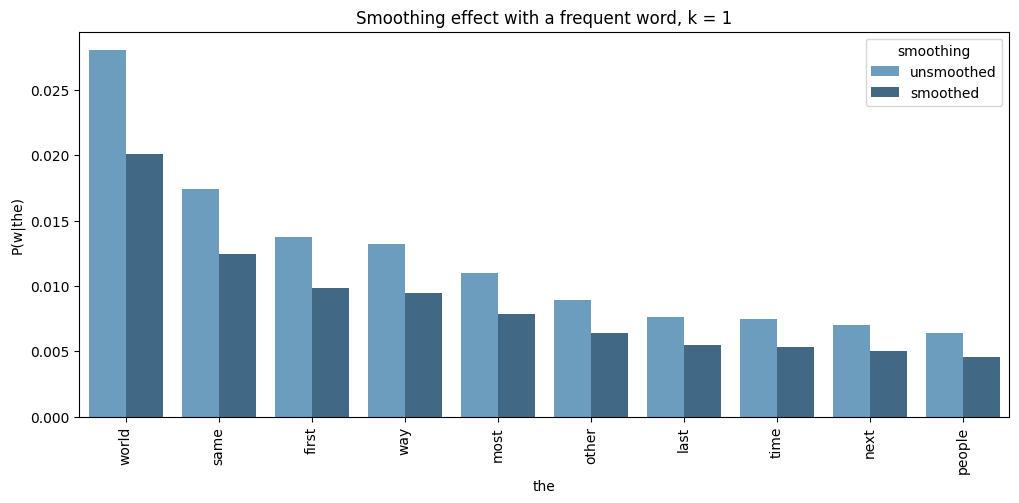

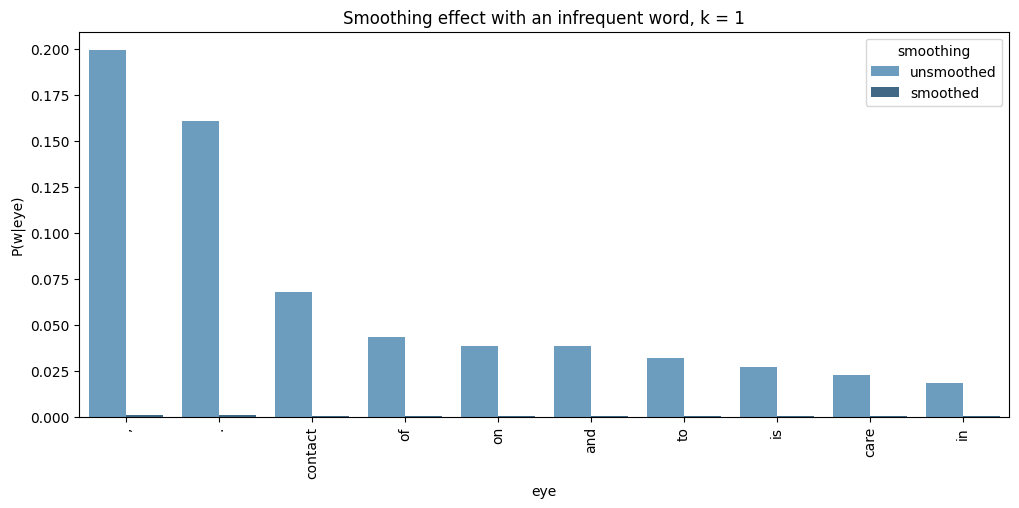

In [ ]:
# Use these variables
Freq_word, Infreq_word = "the", "eye"

## YOUR CODE HERE ##
plot_bigram_dist(Freq_word, Bigram, Bigram_sm, n=10)
plt.title("Smoothing effect with a frequent word, k = 1")
plot_bigram_dist(Infreq_word, Bigram, Bigram_sm, n=10)
plt.title("Smoothing effect with an infrequent word, k = 1")


Text(0.5, 1.0, 'Smoothing effect with an infrequent word')

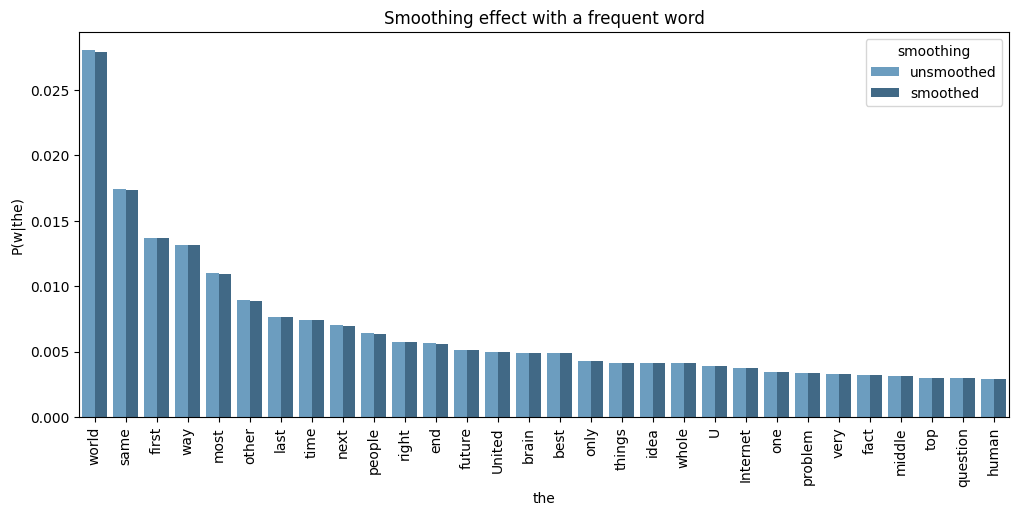

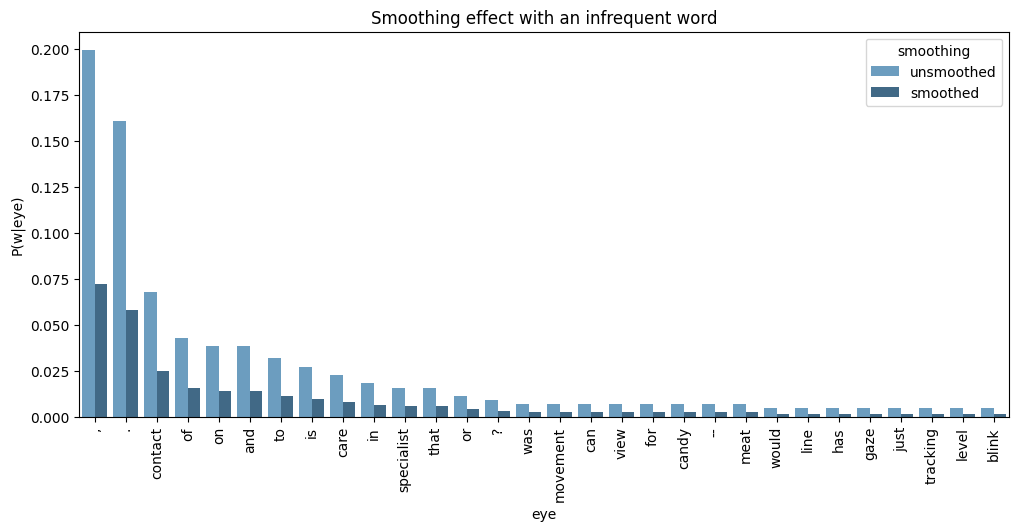

In [ ]:
# Use this K value and reuse Freq_word, Infreq_word
Small_k = 0.01
# non-smoothed bigram
Bigram_sk, Unigram_sk = train_ngram(Data1, 2, Small_k)
# smoothed bigram
Bigram_sm_sk, Unigram_sm_sk = train_ngram(Data1, 2, Small_k)

plot_bigram_dist(Freq_word, Bigram, Bigram_sm_sk, n=30)
plt.title("Smoothing effect with a frequent word")
plot_bigram_dist(Infreq_word, Bigram, Bigram_sm_sk, n=30)
plt.title("Smoothing effect with an infrequent word")


█████ YOUR ANSWER HERE █████


The add-k smoothing method is used to prevent unseen or rare words from getting  a low probability low or a probability of zero. In this sense, the formula shows that different values of k have different effects. 

A low k (e.g. k=0.01) would have little effect on all probabilities, so the differences between smoothed and unsmoothed probabilities would be small. It can be easily demonstrated with the formula. However, rare words (e.g., eye) would tend to have a more significant increase than frequent ones. Mathematically, this phenomenon is explained by looking at the numerator. Infrequent words would lean towards lower counts when considered with their corresponding histories ($$P_{add-1}(w_n\mid w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + |V|*k}.$$). Therefore, an additional value of k summed in the numerator would have a higher effect on the final probability than for frequent words (e.g. the), since the count of the latter is already a higher number. 

On the other hand, a high k (k=1) would increase the effect of smoothing. Therefore, the differences between the unsmoothed and the smoothed probabilities would be higher with respect to the unsmoothed probabilities. This is indeed the effect observed in the graph. Similarly, less frequent words show a greater difference than more frequent words.

In conclusion, it can be appreciated that the add-k-smoothing method prevents rare words from being underrepresented. Considering the small size of the data and the incomplexity of the model, the add-k-smoothing method happens to be effective on reducing this effect. Also, it can be appreciated that the higher the K, the more intense the effect is, especially for the infrequent words. 


## Ex 2.4 Train sent. prob. [5pt] 

**Recall** that if we have a sentence $w_1,\dots,w_n$ we can write

$$P(w_1\dots w_n) = P(w_1)P(w_2|w_1) \cdots P(w_n|w_1 \dots w_{n-1}) \approx P(w_1)P(w_2|w_1)\cdots P(w_n|w_{n-(N-1)}\dots w_{n-1})\prod_{i=1}^{n} P(w_i|w_{i-(N-1)}\dots w_{i-1})$$

where in the last step we make an $N$-gram approximation of the full conditionals.

For example, in the case of a bigram (N=2), the above expression reduces to

$$P(w_1 \dots w_n)\approx P(w_1)\prod_{i=2}^{n} P(w_i| w_{i-1}).$$

The following sentences are taken from the **training data**. Use your **unsmoothed unigram**, **bigram**, and **trigram** language model to estimate their **probabilities**:

    1. Every day was about creating something new .
    2. In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy .

In [ ]:
def sent_prob(sent, lm, N):
    """
    Calculates probability of sent based on the N-gram language mode lm
    :param sent: sentence string
    :param lm: N-gram language model
    :param N: N-gram size
    :returns: probabilitity number
    """
    ## YOUR CODE HERE ##

    sent_list = sent.split()
    # first add the unique start and end symbol to the sentence
    sent_start_end = ['<s>'] * (N-1) + sent_list + ['</s>']
    
    # initiliaze the variable with float 1.0
    prob = 1.0
    # exception for the unigram since it does not contain BOS and EOS
    if N == 1:
      for token in sent_list:
        if token in lm:
          prob *= lm[token]
        else:
          prob *= lm['<unk>'] # prob of unknown symbol
      return prob

    # iterate over the sentence until N+1 depending on the n-gram
    for i in range(len(sent_start_end)-N+1):
      # select the desired token every iteration
      token = sent_start_end[i+N-1]
      # create the history
      history = ' '.join(sent_start_end[i:i+N-1])
      # obtain the conditional probability of the n-gram model
      prob *= lm[history][token]

    return prob

In [ ]:
# Print all the abovemnetioned probabilities.
# The cell output should make it clear what number stands for which probability. 
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.

Sents_from_train = (
    "Every day was about creating something new .", 
    "In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy ."
)

## YOUR CODE HERE ##
print('Probabilities of the different models for the sentence "', Sents_from_train[0], '" are:')

print("-> Unigram: ", sent_prob(Sents_from_train[0], Unigram, 1))
print("-> Unigram smoothed: ", sent_prob(Sents_from_train[0], Unigram_sm, 1))

print("-> Bigram: ", sent_prob(Sents_from_train[0], Bigram, 2))
print("-> Bigram smoothed: ", sent_prob(Sents_from_train[0], Bigram_sm, 2))

print("-> Trigram: ", sent_prob(Sents_from_train[0], Trigram, 3))
print("-> Trigram smoothed: ", sent_prob(Sents_from_train[0], Trigram_sm, 3))

print('\n And the probabilities of the different models for the sentence "', Sents_from_train[1], '" are:')
print("-> Unigram: ", sent_prob(Sents_from_train[1], Unigram, 1))
print("-> Unigram smoothed: ", sent_prob(Sents_from_train[1], Unigram_sm, 1))

print("-> Bigram: ", sent_prob(Sents_from_train[1], Bigram, 2))
print("-> Bigram smoothed: ", sent_prob(Sents_from_train[1], Bigram_sm, 2))

print("-> Trigram: ", sent_prob(Sents_from_train[1], Trigram, 3))
print("-> Trigram smoothed: ", sent_prob(Sents_from_train[1], Trigram_sm, 3))


Probabilities of the different models for the sentence " Every day was about creating something new . " are:
-> Unigram:  8.595078506696817e-24
-> Unigram smoothed:  7.648879770518198e-24
-> Bigram:  4.667998867880972e-17
-> Bigram smoothed:  1.3644865645888377e-26
-> Trigram:  1.241092166741438e-11
-> Trigram smoothed:  1.53715128651244e-35

 And the probabilities of the different models for the sentence " In this machine , a beam of protons and anti-protons are accelerated to near the speed of light and brought together in a collision , producing a burst of pure energy . " are:
-> Unigram:  2.9719712024685995e-98
-> Unigram smoothed:  4.353723090417866e-98
-> Bigram:  2.0159953795734388e-72
-> Bigram smoothed:  1.5562128262994436e-116
-> Trigram:  3.570432747502253e-31
-> Trigram smoothed:  1.4030803922510267e-136


**Repeat** this with the **smoothed (add-1)** versions of the N-grams (in the same above code cell).   
**What** is the effect of smoothing on the probabilities and **how** the effect compare across the different $N$-grams models? Provide explanations for the effect and the comparison.

█████ YOUR ANSWER HERE █████

By smoothing the probabilities, the probability mass from some more frequent events can be reduced and be given to these unseen events. In this way, unseen words will have a higher probability than zero. It helps reduce the variance in the estimated probabilities, which makes the model more robust and less likely to overfit the training data. 

The unigram and the smoothed unigram models do not differ much for either sentence. This is because the smoothing does not introduce much. Only single tokens are added. When compared with bigrams for example, the added number is way lower. 

For the bigrams, the difference is bigger for the longer sentence. This makes sense since longer sentences result in more potential options, meaning that the chance is smaller that this particular sentence comes to fruition. This is the same for the trigrams with exactly the same reason. 

All smoothed models have a lower probability. This can be explained by the fact that smoothing lowers the chances of high frequency words thus lowering the probability of sentences with these in them. Since these are high-frequency words, there is a greater chance that a sentence contains these words and that their probability will be lowered. 

The overall higheset scoring model is the trigram followed by the bigram, unigram, smoothed unigram, smoothed bigram and lastly the smoothed trigram. This is caused by the fact that there are many more trigrams than there are bi- or unigrams. Since the data is taken from the training data, all instances occur. The smoothed trigram is lowest since no new pairs are introduced but their scores are still lowered because of the smooting. 

Overall, the effect of smoothing on probabilities can improve the robustness of n-gram models to unseen data and lead to better performance on tasks such as language modeling and text classification. However, it is important to choose an appropriate value of k for the specific task and corpus being considered, as too much or too little smoothing can lead to suboptimal results.

## Ex 2.5 Test sent. prob. [5pt]

The above sentences were taken from the training set, hence they will all have a probability greater than 0. The big challenge for our language model are of course with the sentences that contain unseen N-grams: if such an N-gram occurs our model immediately assigns the sentence probability zero.

The following sentences are taken from the **test set** available in the file **ted-test.txt**.  
**Print** the probabilities of the sentences based on the smoothed and unsmoothed language models.

    1. Because these robots are really safe .
    2. We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality .

In [ ]:
# Print all the abovemnetioned probabilities.
# The cell output should make it clear what number stands for which probability. 
# Reuse the variables Unigram, Unigram_sm, Bigram, Bigram_sm, Trigram, and Trigram_sm.

Sents_from_test = (
    "Because these robots are really safe .", 
    "We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality ."
)
### YOUR CODE HERE ###

print('Probabilities of the different models for the sentence "', Sents_from_test[0], '" are:')

print("-> Unigram: ", sent_prob(Sents_from_test[0], Unigram, 1))
print("-> Unigram smoothed: ", sent_prob(Sents_from_test[0], Unigram_sm, 1))

print("-> Bigram: ", sent_prob(Sents_from_test[0], Bigram, 2))
print("-> Bigram smoothed: ", sent_prob(Sents_from_train[0], Bigram_sm, 2))

print("-> Trigram: ", sent_prob(Sents_from_test[0], Trigram, 3))
print("-> Trigram smoothed: ", sent_prob(Sents_from_test[0], Trigram_sm, 3))

print('\n And the probabilities of the different models for the sentence "', Sents_from_test[1], '" are:')
print("-> Unigram: ", sent_prob(Sents_from_test[1], Unigram, 1))
print("-> Unigram smoothed: ", sent_prob(Sents_from_test[1], Unigram_sm, 1))

print("-> Bigram: ", sent_prob(Sents_from_test[1], Bigram, 2))
print("-> Bigram smoothed: ", sent_prob(Sents_from_test[1], Bigram_sm, 2))

print("-> Trigram: ", sent_prob(Sents_from_test[1], Trigram, 3))
print("-> Trigram smoothed: ", sent_prob(Sents_from_test[1], Trigram_sm, 3))


Probabilities of the different models for the sentence " Because these robots are really safe . " are:
-> Unigram:  3.1909930364361235e-21
-> Unigram smoothed:  2.885703202229635e-21
-> Bigram:  2.6913665324688018e-15
-> Bigram smoothed:  1.3644865645888377e-26
-> Trigram:  0.0
-> Trigram smoothed:  2.469078387813263e-33

 And the probabilities of the different models for the sentence " We have sheer nothingness on one side , and we have this vision of a reality that encompasses every conceivable world at the other extreme : the fullest possible reality , nothingness , the simplest possible reality . " are:
-> Unigram:  7.258971740589103e-116
-> Unigram smoothed:  6.894614640502856e-116
-> Bigram:  0.0
-> Bigram smoothed:  1.0509210576998523e-126
-> Trigram:  0.0
-> Trigram smoothed:  0.0


**Contrast** the smoothed and unsmoothed probabilities and **explain** the drastic changes (if any) in terms of unseen tokens and sequences.

█████ YOUR ANSWER HERE █████
The unigram hardly shows a difference. This is logical since only single tokens are taken into account and the introduction of a new, unseen token does not heavily impact the rest of the tokens. 

The bigram and trigram for the first sentence sees a sharp decline in probability as soon as smoothing is introduced. This can be explained by the fact that all token combinations were in the training set (otherwise the value would have been 0). With smoothing all of these will be lowered. 

The bigram for the second sentence sees an increase. This is because not all bigrams that were in the test set, were in the training set as well. Smoothing fixed this problem. 

The trigrams for the second sentence both see a 0. This has to do with an non-existent unseen history. Following the formula, the count considered are that of the combination of the history and the studied word (numerator) along with the count for the history (denominator). Thus, unseen history would only leave us with a probability of the inverse of the size of the vocabulary. However, this is not a proper way of assesing the problem and further mathematical analysis needs to be made. The probability of the word should also be considered for unseen combinations. 

### [Extra]

**Optional** What percentage of the sentences in the test set get assigned probability 0 under your smoothed and unsmoothed language models? 

In [ ]:
### ANSWER HERE ###

## Ex 2.6 Perplexity [5pt]

**Perplexity** is very frequently used **metric** for evaluating probabilistic models such as language models. The perplexity (sometimes called **PP** for short) of a language model on a sentence is the **inverse probability** of the sentence, **normalized** by the number of words:

$$PP(w_1 \dots w_n) = P(w_1\dots w_n)^{-\frac{1}{n}}.$$

Here we can again approximate $P(w_1 \dots w_n)$ with N-gram probabilities, as above.
Note: $(x_1\cdots x_n)^{-\frac{1}{n}}$ is the **geometric mean** of the numbers $x_1,\dots,x_n$. It is like the (regular) arithmetic mean, but with **products** instead of **sums**. The geometric mean is a more natural choice in the case of *PP* because behind $P(w_1\dots w_n)$ is a series of $n$ products ([more here](https://en.wikipedia.org/wiki/Geometric_mean)).



Compute the perplexity of the sentences in the training data (from exercise 2.1) based on the smoothed bigram language model.  
What big difference between the **probabilities** of the sentences and the **perplexities** of the sentences do you notice?  
**Provide** the evidence (can be visualized too) and **explain** the difference.

In [ ]:
# Feel free to reuse functions and variables form the previous exercises

### YOUR CODE HERE ###

def sent_perplexity(sent, lm, N):
  """
  Calculates perplexity of sent based on the N-gram language model lm
  :param sent: sentence string
  :param lm: N-gram language model
  :param N: N-gram size
  :returns: perplexity number
  """
  # first add the unique start and end symbol to the sentence
  sent_list = sent.split()
  sent_start_end = ['<s>'] * (N-1) + sent_list + ['</s>']

  prob = 1.0

  # exception for the unigram
  if N == 1:
    for token in sent_list:
      if token in lm:
        prob *= lm[token]
      else:
        prob *= lm['<unk>']
    return prob

  # similar structure as the sent_prob function
  for i in range(N-1, len(sent_start_end)):
    token = sent_start_end[i]
    history = ' '.join(sent_start_end[i-N+1:i])

    # add the condition to check the history and the unknow symbol
    if history in lm and token in lm[history]:
      prob *= lm[history][token]
    else:
      prob *= lm['<unk>'][token]

  # apply the formula of perplexity with the calculated probabilities using the power
  perplexity = pow(prob, -1.0/len(sent_start_end))
  return perplexity

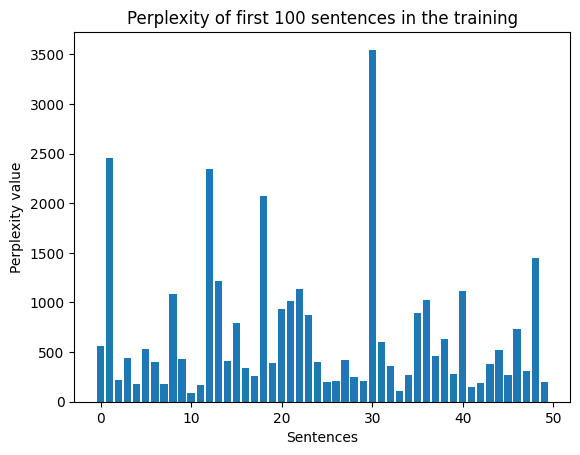

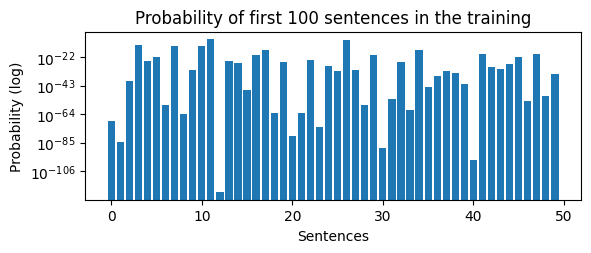

In [ ]:
import matplotlib.pyplot as plt

Data_p, vocab_p = read_data('data/ted-train.txt')
data = Data_p[:50]

perplexity_values = []
prob_values = []
for sent in data:
    sent_str = ' '.join(sent).replace('<s> ', '').replace(' </s>', '')
    perplexity_values.append(sent_perplexity(sent_str, Bigram_sm, 2))
    prob_values.append(sent_prob(sent_str, Bigram_sm, 2))

plt.bar(range(len(perplexity_values)), perplexity_values)

plt.xlabel('Sentences')
plt.ylabel('Perplexity value')
plt.title('Perplexity of first 100 sentences in the training')

plt.show()

fig = plt.figure()
ax = fig.add_subplot(2, 1, 1)
ax.bar(range(len(prob_values)), prob_values)
ax.set_xlabel('Sentences')
ax.set_ylabel('Probability (log)')
ax.set_title('Probability of first 100 sentences in the training to the log scale')
ax.set_yscale('log')

█████ YOUR ANSWER HERE █████

The perplexity of a language model on the train set is the inverse probability of the train set, normalized by the number of words. It can also be explained as the weighted average branching factor of a language, the branching factor being the number of possible next words that can follow any word. It could be interpreted as a measure of how well the language model predicts a sentence.

On the top graph, we plot the perplexity values for the first 50 sentences in the training data. The values are positive numbers ranging until around 3500, the lower the number indicating a better model performance. There is a lot of variability in the resulting values, which can be attributed to the sentence complexity, their length, or since we are using the smoothed bigram, the smoothing technique itself. 

On the bottom graph, we plot the probabilities of those first 50 sentences, which represent the likelihood of observing a particular sentence as determined by the model. The higher the value, between 0 and 1, means the more likely a sentence is. We used a logarithmic scale to visualize the variety of the resulting probabilities. 

At a first glance, there is no clear correlation between the perplexity values and the probabilities. Nevertheless, the perplexity is expected to be lower with higher probabilities, since it is related inversely to the likelihood of the sentence. It should be noted that improving perplexity, as an intrinsic measure, does not guarantee a corresponding improvement in the performance of language processing tasks, which is considered extrinsic evaluations.

The normalization in the perplexity is applied to the power scale. Thus, when plotting the probabilities to the logarithm scale the variability between the two graphs happens to be similar. 

In general, a lower perplexity indicates that the language model is a better predictor of the words in the set.


# That's it!

Congratulations, you have made it to the end of the tutorial. Here we will recap the gist of this notebook. 

**Make sure all your cells can be executed and all your answers are there. Then, read on if you're interested!**

-----

By now you should have a solid feeling for the problem of **sparsity in language data**; there's just never enough data. For the task of language modelling, we saw that sparsity is a serious challenge. 

It would be great to be able to model $p(w_n|w_1 \dots w_{n-1})$ for unlimited $n$: the larger $n$ the better our language model should become at capturing the long-range dependencies between words that characterize actual human sentences, and the more probability our model will assign to such sentences as opposed to sentences that are word-soup. But in the N-gram approach, increasing $n$ will quickly kill all generalizing abilities of the model: the model will start to assign probabilities only to sentences it has seen in the training data.

So, where to go from here? Here are three directions that we could head in.

### Smoothing

We have seen one example of smoothing in this lab: add-k smoothing. This is an easy method, both conceptually and implementation-wise. But the results are not great, and the effects it has on the distributions can be extreme.

A much more sophisticated method of smoothing is **Kneser-Ney smoothing**. The method is described in detail in section 4.5 of J&M (3rd edition). This is one of the best-performing N-gram smoothing methods, and up to a few years ago, a popular implementation of it called [KenLM](https://kheafield.com/code/kenlm/) gave state-of-the-art results.

### From words to characters

In this lab we have considered language modeling as the task of predicting a **word** $w_n$ based on a history of **words** $w_1\cdots w_n$. What if instead we let our basic units of modelling be **characters**? The task then becomes to model $p(c_k\mid c_{k-N-1}\dots c_{k-1})$ where each $c_i$ is now an ASCII character instead of an entire word.

Suddenly sparsity of data is no longer a problem! The set of characters to use is tiny (< 100) compared to even a small-sized vocabulary as today. Have a look at this very illustrative notebook written by Yoav Golberg to see such a method in action: [The unreasonable effectiveness of Character-level Language Models](http://nbviewer.jupyter.org/gist/yoavg/d76121dfde2618422139).

(So what is the downside?)


### Neural language models

The above notebook was actually written as a response to this blog post by Andrej Karpathy: [The Unreasonable Effectiveness of Recurrent Neural Networks](http://karpathy.github.io/2015/05/21/rnn-effectiveness/). Go ahead and read it if you haven't already: it is a superb introduction to the topic of Recurrent Neural Networks.

Neural language models solve the problem of data sparsity in a different manner. Instead of estimating the probabilities $p(w_k\mid w_{k-N-1}\dots w_{k-1})$ by counting occurrences in the data, they use a neural network $f_{\theta}$ parametrized by parameters $\theta$ to predict this probability. The parameters $\theta$ are learned through optimization. 

The simplest approach goes like this: each word in the history $w_{k-N-1}\dots w_{k-1}$ is embedded separately giving vectors $e_{k-N-1}\dots e_{k-1}$ and then concatenated into one long vector $[e_{k-N-1};\dots ;e_{k-1}]$. The network then uses this history vector to predict a probability distribution over words $w$ in the vocabulary $V$:

$$p(w \mid w_{k-N-1}\dots w_{k-1}) = f_{\theta}([e_{k-N-1};\dots;e_{k-1}]).$$

(In order to produce legitimate probabilities the final layer of such a network will be for example a $softmax$.)

This provides a solution to the sparsity problem by having the network let the individual embeddings of the words in the history interact through its non-linear transformation. We are letting the network figure out the smoothing itself!

RNNs are a clever extension of this idea, where a hidden state vector $h$ is re-used and updated at each step $k$ in order to store the information of the entire history up to step $k-1$. That is, an RNN actually does away with the N-order approximation; it tries to model the full conditional directly! That means that

$$p(w \mid w_1\dots w_{k-1}) \approx RNN_{\theta}([e_{k-1};h_{k-1}])$$

where the hidden state $h_{k-1}$ is a compression of the *entire history* $w_1\dots w_{k-1}$.

Another great place to learn about RNNs, their problems, and solutions to those, is on the blog of [Christopher Olah](http://colah.github.io/posts/2015-08-Understanding-LSTMs/). 

-----------
(And now, it's time to read the classic essay by Eugene Wigner that gave both of the posts their title: [The Unreasonable Effectiveness of Mathematics in the Natural Sciences](http://www.dartmouth.edu/~matc/MathDrama/reading/Wigner.html))

# Acknowledgments

Most of this lab was developed in collaboration with Joost Bastings and Dan Douwe.  
Later it was revised by a couple of people.  
The recent updates by Lasha Abzianidze make the notebook more streamlined and foolproof from the grading and the large course perspectives. 